# K-means

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1 = sio.loadmat("./exp7data/exp7data1.mat")
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X = data1["X"]
X.shape         # 300个点

(300, 2)

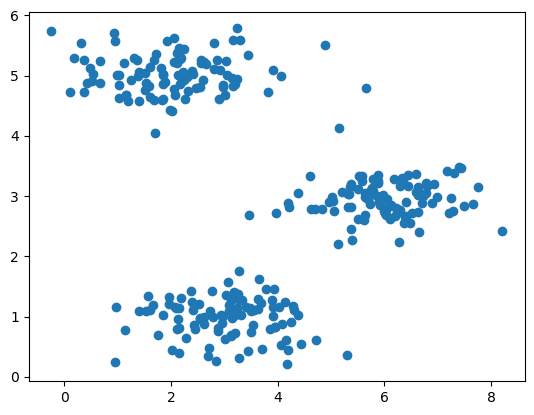

In [4]:
plt.scatter(X[:,0], X[:,1])
plt.show()

## 判断每个样本点所属的类别

In [5]:
# 分为三类
def classify(X, center):
    idx = []
    for i in range(len(X)):
        d = np.linalg.norm((X[i] - center), axis=1)
        idx_i = np.argmin(d)
        idx.append(idx_i)

    return np.array(idx)

In [6]:
center = np.array([[3, 3], [6, 2], [8, 5]])
# print(X[0])
# print(X[0] - centers)

idx = classify(X, center)
idx[:10]

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0])

## 计算聚类中心点

In [7]:
def findCenter(X, idx, k):
    center = []
    for i in range(k):
        c = np.mean(X[idx==i], axis=0)
        center.append(c)

    return np.array(center)

In [8]:
findCenter(X, idx, k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

## 重复执行上面两个步骤

In [9]:
def Kmeans(X, center, iters):
    """
    return: 分类结果, 所有的中心点
    """
    k = len(center)  # 3
    centers = []            # 所有中心点
    centers.append(center)  # 原本的中心点
    centers_i = center
    for i in range(iters):
        idx = classify(X, centers_i)  # 一次分类结果
        centers_i = findCenter(X, idx, k)  # 再找一次中心点
        centers.append(centers_i)

    return idx, np.array(centers)

In [10]:
def plotTrace(X, centers, idx):
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=idx, cmap="rainbow")
    plt.plot(centers[:,:,0], centers[:,:,1], "kx--")

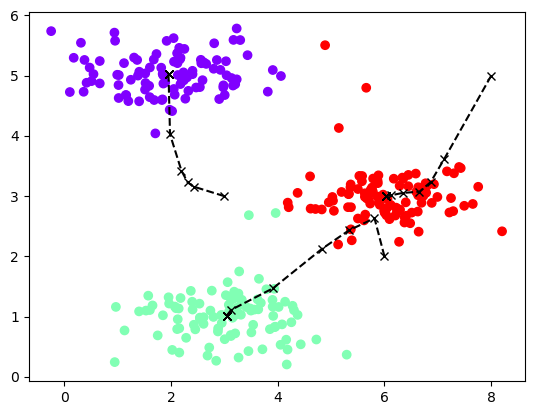

In [11]:
idx, centers = Kmeans(X, center, iters=20)
plotTrace(X, centers, idx)

## 初始聚类点的位置对聚类结果的影响

In [12]:
# 样本中选k个点作为中心点
def initCenter(X, k):
    idx = np.random.choice(len(X), k)

    return X[idx]

In [13]:
initCenter(X, k=3)

array([[6.63262745, 3.14799183],
       [2.39775807, 1.24721387],
       [7.30278708, 3.38015979]])

---
选5次中心点观察结果

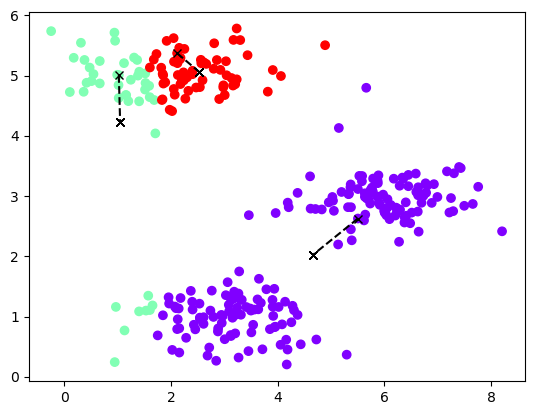

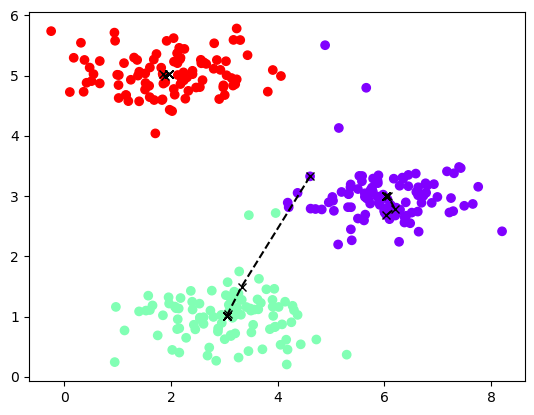

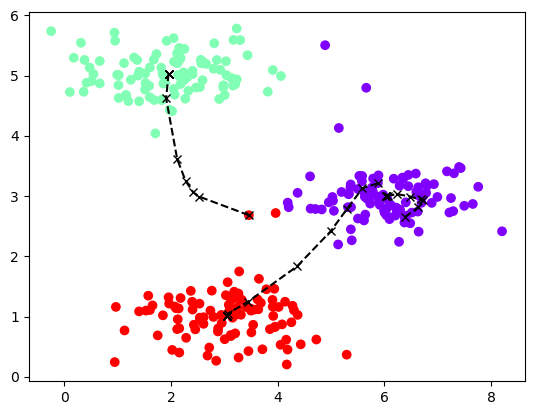

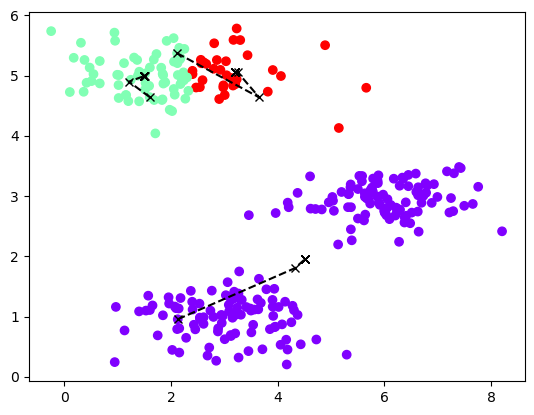

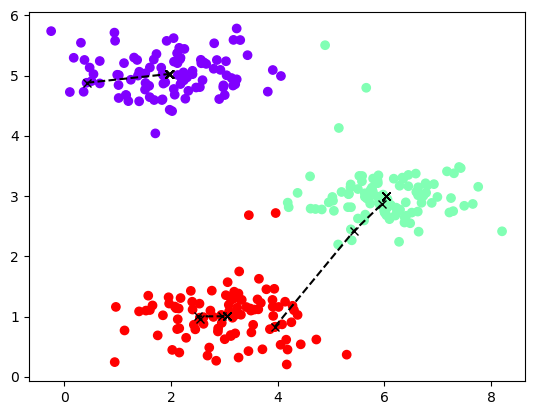

In [14]:
for i in range(5):
    idx, centers = Kmeans(X, initCenter(X, k=3), iters=10)
    plotTrace(X, centers, idx)

# 使用$K-means$对图片颜色进行聚类

In [15]:
from skimage import io

In [16]:
data = sio.loadmat("./exp7data/bird_small.mat")
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [17]:
A = data["A"]
A.shape

(128, 128, 3)

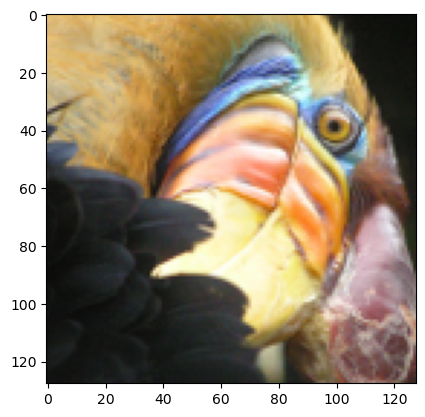

In [18]:
img = io.imread("exp7data/bird_small.png")
plt.imshow(img)

In [19]:
A = A / 255           # 归一化
A = A.reshape(-1, 3)  # (128*128) * 3
A[:10]

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       [0.8745098 , 0.7254902 , 0.41176471],
       [0.88235294, 0.70196078, 0.40392157],
       [0.89411765, 0.73333333, 0.45098039],
       [0.89411765, 0.7254902 , 0.43529412],
       [0.89411765, 0.73333333, 0.44705882],
       [0.88235294, 0.71764706, 0.41960784],
       [0.85490196, 0.6745098 , 0.37647059]])

[[0.91791578 0.81438105 0.67372136]
 [0.35170974 0.30674383 0.29976745]
 [0.49919479 0.36939373 0.21150655]
 [0.70966363 0.62453486 0.52896416]
 [0.69256699 0.50424576 0.22964612]
 [0.06628422 0.07192679 0.06179809]
 [0.1255374  0.13444081 0.12526144]
 [0.17635122 0.17700555 0.17087782]
 [0.26363329 0.22988703 0.21181665]
 [0.84864744 0.61295703 0.31418381]
 [0.56427641 0.47627345 0.42644419]
 [0.3631398  0.41643748 0.55450726]
 [0.09220006 0.09978678 0.08921499]
 [0.56260951 0.68509595 0.82316437]
 [0.87396035 0.7279433  0.46549725]
 [0.97318477 0.94402764 0.81020451]]


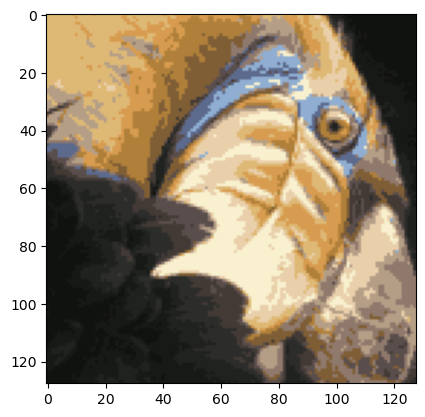

In [20]:
k = 16
idx, centers = Kmeans(A, initCenter(A, k=16), iters=20)
center = centers[-1]
print(center)
image = np.zeros(A.shape)
for i in range(k):
    image[idx==i] = center[i]
image = image.reshape(128, 128, 3)
plt.imshow(image)